### For this task, you should use the dataset from the first homework. Your dataset must contain at least 1000 descriptors, excluding the target ("raw_value"), and all the data cleansing steps must have been completed.

Your task:

1. Create at least 3 different types of statistical plots and 1 interactive plot to analyze your data. Use seaborn and plotly to visualize them. Draw conclusions and explain why the graphs are useful for analyzing your data.

2. Perform statistical tests for one categorical variable and multiple numeric descriptors. Draw conclusions and interpret your results.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
core_columns = pd.read_excel("data_mod1_raw_value_devided.xlsx").columns
df_from_task1_full = pd.read_csv("./hw1_dataset.csv")
df_from_task1 = df_from_task1_full[core_columns]
df_from_task1.sample(3)

,DOI,Date,Journal,Title,Name,measurement_error,measurement_wavelength,normalised_name,value_from,value_to,method_categorical
538,10.1016/j.spjpm.2015.03.008,3/11/2015,St. Petersburg Polytechnical University Journa...,CONSTANTELECTRICFIELDEFFECTDIPOLEMOMENTACOMBLI...,cyclohexanone,0.0,0.036812,O=C1CCCCC1,2.005375,2.005375,2
332,10.1016/j.supflu.2005.02.001,3/7/2005,The Journal of Supercritical Fluids,SUPERIORMIRAGEEFFECTINSUPERCRITICALCO2EXPERIME...,CO2,0.0,0.036812,O=C=O,1.116000,1.116000,0
593,10.1016/j.fluid.2014.10.005,10/21/2014,Fluid Phase Equilibria,ACHEMICALSTRUCTUREBASEDMODELFORESTIMATIONREFRA...,Methylfluoride,0.0,0.036812,CF,1.174000,1.174000,2


In [4]:
# Давайте посмотрим на колонку Date
# Определим, какой год самый публикуемый на статьи оказался
from dateutil.parser import parse
dates = df_from_task1["Date"].apply(lambda x: str(parse(x, fuzzy=True).year))

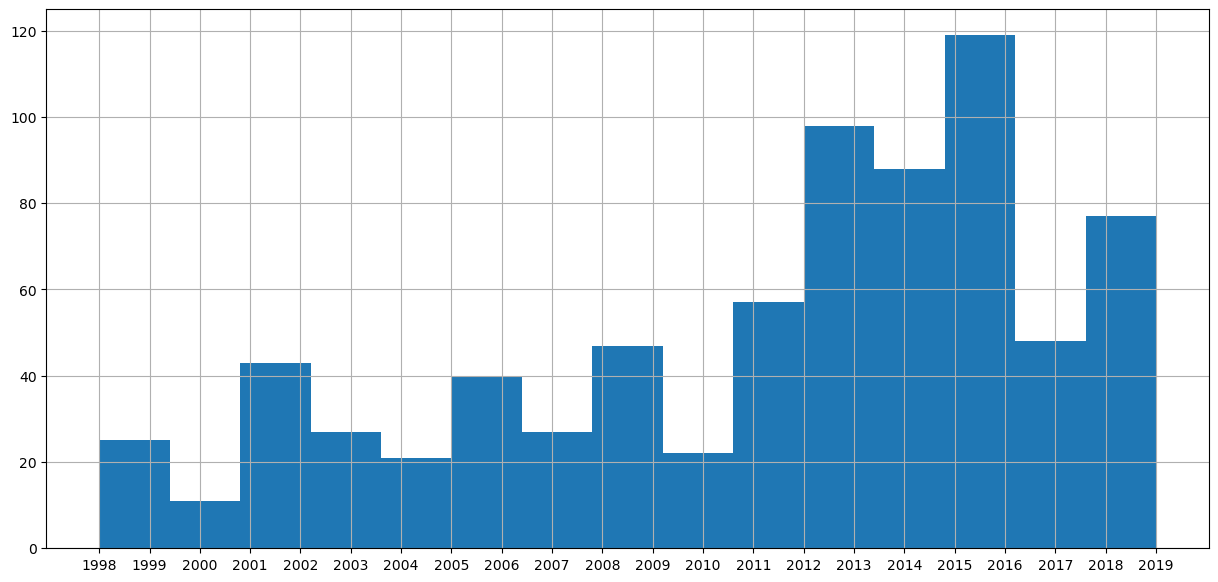

In [5]:
pd.Series(data=dates.sort_values()).hist(bins=15,figsize=(15,7))

### Выводы

По грвфику видно, что в период с 2015 по 2016 год статьи в этом датасете публиковались чаще всего

In [ ]:
# Визуализируем категориальную переменную - метод измерения

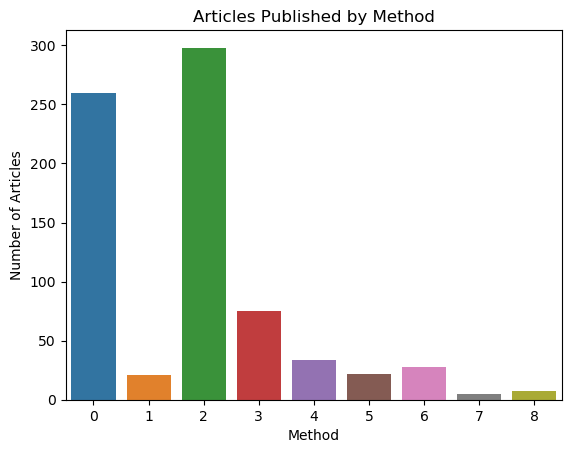

In [6]:
import matplotlib.pyplot as plt

# Сгруппировать по категориям
df_grouped = df_from_task1.groupby("method_categorical")['Title'].count().reset_index()

# Создать график 
sns.barplot(x='method_categorical', y='Title', data=df_grouped)

plt.xlabel('Method')
plt.ylabel('Number of Articles')
plt.title('Articles Published by Method')
plt.show()

### Выводы

По грвфику видно, что метод 2 пользуется большей популярность среди просмотренных статей

In [10]:
df_from_task1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DOI                     750 non-null    object 
 1   Date                    750 non-null    object 
 2   Journal                 750 non-null    object 
 3   Title                   750 non-null    object 
 4   Name                    750 non-null    object 
 5   measurement_error       750 non-null    float64
 6   measurement_wavelength  750 non-null    float64
 7   normalised_name         750 non-null    object 
 8   value_from              750 non-null    float64
 9   value_to                750 non-null    float64
 10  method_categorical      750 non-null    int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 64.6+ KB


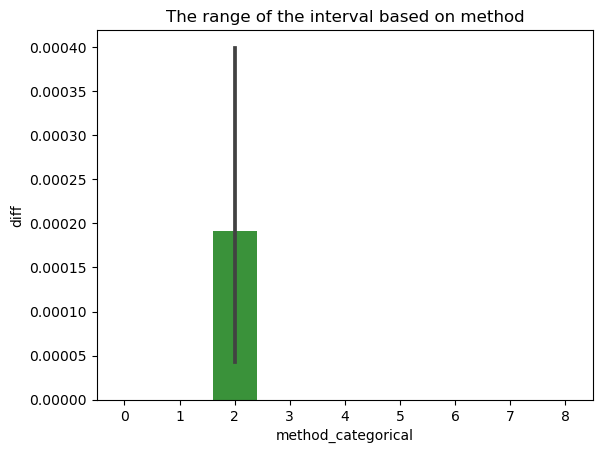

In [29]:
# Проведем анализ между разнцей в разбросе от value_from до value_to и метода измерения
diff = abs(df_from_task1["value_from"] - df_from_task1["value_to"])

import seaborn as sns

data = pd.concat([diff,df_from_task1["method_categorical"]],axis=1)
data.columns = ["diff","method_categorical"]

# Создать график 
sns.barplot(x='method_categorical', y='diff', data=data)

plt.xlabel('method_categorical')
plt.ylabel('diff')
plt.title('The range of the interval based on method')
plt.show()

In [33]:
df_from_task1.loc[(abs(df_from_task1["value_from"] - df_from_task1["value_to"])>0),"method_categorical"]

225    2
258    2
300    2
439    2
684    2
Name: method_categorical, dtype: int64

### Выводы

По графику видно, что все хоть какие-нибудь не нулевые интервалы относятся к второму методу

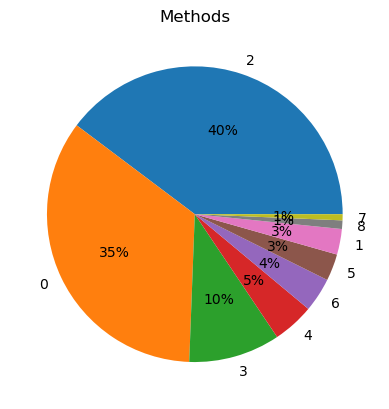

In [88]:
# Посмотрим распредление в процентах соотненения образца к методу измерения

group_method_error = df_from_task1["method_categorical"].value_counts()
plt.pie(group_method_error.values, labels=group_method_error.index, autopct='%1.0f%%')
plt.title('Methods')
plt.show()

### Выводы

По графику видно, что 2 метод самый популярный, так как по литературе, если разбивать на публишера и метод - самый популярный

In [93]:
ranom_num_columns = df_from_task1_full.select_dtypes(include='number').columns.tolist()[15:20]

In [94]:
desc = df_from_task1_full[ranom_num_columns]
#Delete lines from None
desc = desc.dropna()
desc

,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1
0,0.397812,0.394096,0.009840,0.003647,0.250000
1,0.420575,0.358849,0.068585,0.034292,1.000000
2,0.402673,0.373526,0.044123,0.004455,0.208333
3,0.600000,0.300000,0.333333,0.166667,0.150000
4,0.435216,0.352344,0.079427,0.058693,0.338710
...,...,...,...,...,...
745,0.600000,0.310644,0.333333,0.148926,0.178571
746,0.463065,0.359818,0.105108,0.066970,0.250000
747,0.429446,0.362941,0.061765,0.049076,0.234375
748,0.452430,0.359574,0.087383,0.067377,0.295455


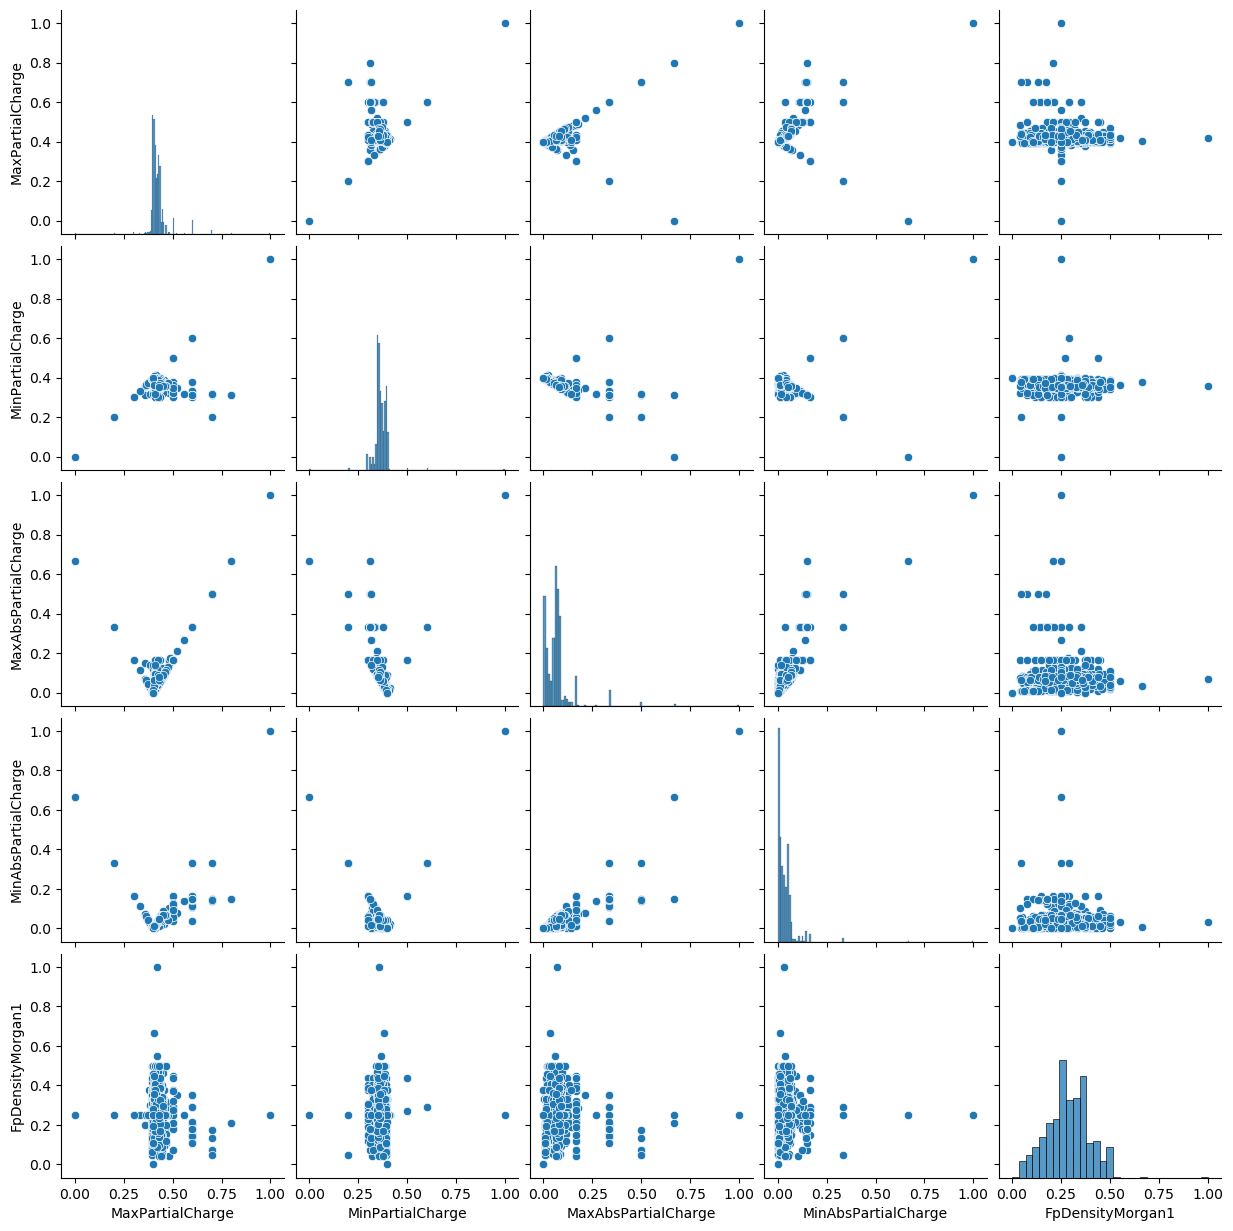

In [95]:
sns.pairplot(desc)

Видно что есть ~линейная зависимость между переменными, но не в явном виде, так же много графиков с гистограммой распределения
и похожих на те, что описываются вокруг среднего значения

### Статистика

In [96]:
df_from_task1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DOI                     750 non-null    object 
 1   Date                    750 non-null    object 
 2   Journal                 750 non-null    object 
 3   Title                   750 non-null    object 
 4   Name                    750 non-null    object 
 5   measurement_error       750 non-null    float64
 6   measurement_wavelength  750 non-null    float64
 7   normalised_name         750 non-null    object 
 8   value_from              750 non-null    float64
 9   value_to                750 non-null    float64
 10  method_categorical      750 non-null    int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 64.6+ KB


In [102]:
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.contingency_tables as tables
import scipy.stats as stats

# Тест Фишера также используется для проверки независимости двух категориальных переменных, 
# но он более точен, особенно если у вас мало наблюдений

# Create the contingency table
contingency_table = pd.crosstab(index=df_from_task1["Name"], columns=df_from_task1["method_categorical"])

# Perform the chi-squared test for independence
stat, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Stat: {stat:.4f}")
print(f"P-value: {p:.4f}")

Stat: 6000.0000
P-value: 0.4685


Критерий хи-квадрат (Chi-Square): показал связь p>0.05 - значит переменнеы как-то свзяаны

In [108]:
ranom_num_columns = df_from_task1_full.select_dtypes(include='number').columns.tolist()[15:20]
df_from_task1_full[ranom_num_columns].describe()

,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1
count,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.423695,0.367104,0.071021,0.035467,0.285947
std,0.050368,0.038423,0.078632,0.057167,0.111640
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.403150,0.352374,0.027594,0.007861,0.214286
50%,0.413585,0.362305,0.065583,0.022937,0.281250
75%,0.431343,0.387328,0.080205,0.050473,0.375000
max,1.000000,1.000000,1.000000,1.000000,1.000000


Просто статичтика по дискрипторам типа числовой - они уже нормализованные

In [109]:
from scipy.stats import norm, t

data = df_from_task1_full["FpDensityMorgan1"]

# Confidence interval for the mean (assume normal distribution)
n = len(data)
s = np.std(data, ddof=1)
se = s/np.sqrt(n)
z = norm.ppf(0.975)     # 95% confidence interval for a normal distribution
ci = (np.mean(data) - z*se, np.mean(data) + z*se)

print(f"95% Confidence Interval for the Mean (Normal Distribution): {ci}")

# Confidence interval for the mean (assume t-distribution)
df = n-1
t_val = t.ppf(0.975, df)  # t-value for a 95% confidence interval with df=n-1
se_t = s/np.sqrt(n)
ci_t = (np.mean(data) - t_val*se_t, np.mean(data) + t_val*se_t)

print(f"95% Confidence Interval for the Mean (t-Distribution): {ci_t}")

95% Confidence Interval for the Mean (Normal Distribution): (0.27795712235875825, 0.2939367458222084)
95% Confidence Interval for the Mean (t-Distribution): (0.2779441904943426, 0.29394967768662406)


Доверительный интервал для FpDensityMorgan1

(Normal Distribution): (0.27795712235875825, 0.2939367458222084)
(t-Distribution): (0.2779441904943426, 0.29394967768662406)


Доверительный интервал (ДИ) - это диапазон значений, который, вероятно, содержит истинный параметр совокупности с определенной степенью вероятности

## Correlations

**Linear Multicollinearity investigation**

In [2]:
df = pd.read_csv("hw1_dataset.csv")

Firstly let's check correlation matrix for pearson coefficient 

In [3]:
correlations_df = df.iloc[:, 11:].corr(method="pearson").abs()


<AxesSubplot: >

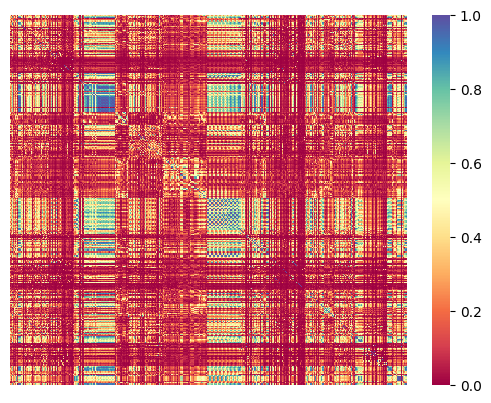

In [4]:
sns.heatmap(correlations_df, cmap="Spectral", yticklabels=False, xticklabels=False)


Correlation matrix shows correlation coefficients between each column in df, but i this case it is not very informative, we can see that some variables are correlated, some not. Let's remove all columns which are highly correlated.

In [5]:
# First choose upper triangle
triangle = correlations_df.where(np.triu(np.ones(correlations_df.shape), k=1) != 0)


In [6]:
# Check all correlated columns
correlated_columns = [
    column for column in triangle.columns if any((triangle[column] > 0.5))
]


In [7]:
# Now we can remove these columns
low_correlation = df.drop(correlated_columns, axis=1)


<AxesSubplot: >

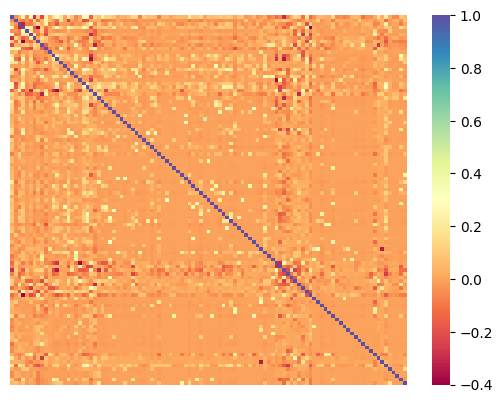

In [8]:
# Now let's plot correlation matrix in this case
low_correlations_df = low_correlation.iloc[:, 11:].corr(method="pearson")
sns.heatmap(low_correlations_df, cmap="Spectral", yticklabels=False, xticklabels=False)


In [9]:
low_correlations_df.columns.shape[0]
# Still a lot of columns, but at least we can see that most are not correlated at all


105

*Non-linear correlations*

We can also check if some of these columns are still non-linearly correlated by utilizing spearman coefficient

In [10]:
correlations_df_spearman = low_correlations_df.iloc[:, 11:].corr(method="spearman")


<AxesSubplot: >

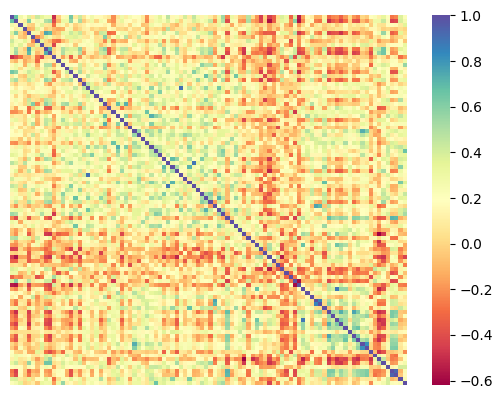

In [11]:
sns.heatmap(
    correlations_df_spearman, cmap="Spectral", yticklabels=False, xticklabels=False
)


We can see that there are some strong positive and negative non-linear correlations, we can get rid of them too

<AxesSubplot: >

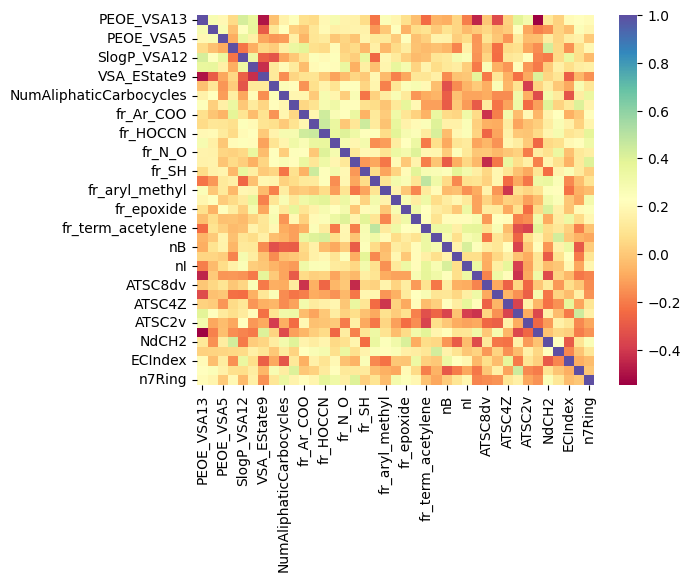

In [12]:
# First choose upper triangle
triangle = correlations_df_spearman.where(
    np.triu(np.ones(correlations_df_spearman.shape), k=1) != 0
)

# Check all correlated columns
correlated_columns = [
    column for column in triangle.columns if any((triangle[column] > 0.5))
]

# Now we can remove these columns
low_correlation = low_correlations_df.drop(correlated_columns, axis=1)

# Now let's plot correlation matrix in this case
low_correlations_df = low_correlation.iloc[:, 11:].corr(method="spearman")
sns.heatmap(low_correlations_df, cmap="Spectral")


We can see that out of all values there aren't many completely non-correlated ones. No wonder, >2000 descriptors means that most of them are just transformed other descriptors. But it is not very important, as we still have to use >1000 descriptors dataset

## Linear dimension reduction method

There aren't many linear dimension reduction methods that are very distinct from PCA. LDA is for classification, ICA isn't very interpretable and is rarely used in python except for analysis of signals, other implementations of this algorithm in python are quite poor. We still have a good option, which is singular value decomposition. It is widely used in linear algebra and ml and it is quite similar to PCA, but it's faster for big datasets.

In [13]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt


In [14]:
# As always split dataset
df_desc = df.iloc[:, 11:]
df_info = df.iloc[:, :11]


We can also choose columns that we later will check for correlation with components

In [15]:
print(list(df_desc.columns))


['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', '

In [16]:
# These are the columns that i think may be important

interesting_columns = [
    "MW",
    "Radius",
    "apol",
    "RNCG",
    "RPCG",
    "BalabanJ",
    "nH",
    "nAtom",
    "SLogP",
    "nAcid",
    "nBase",
]


We can start with 100 components and then decide based on explained variance

In [17]:
num_of_components = 100


In [18]:
svd = TruncatedSVD(n_components=num_of_components)
df_svd = svd.fit_transform(df_desc)
cum_expl_var = np.cumsum(svd.explained_variance_ratio_)
n_comp_i = np.arange(1, num_of_components + 1, step=1)


In [19]:
variance_df = pd.DataFrame(
    np.array([n_comp_i, cum_expl_var]).T,
    columns=["number_of_components", "explained_variance"],
)


Text(0.5, 1, 'Explained variance: 95%')

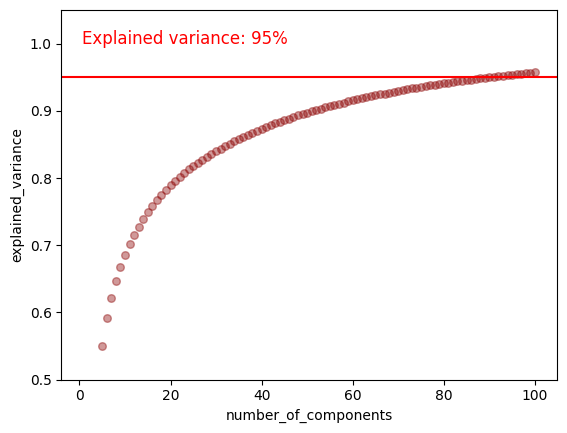

In [20]:
# plot results
plt.ylim(0.5, 1.05)
sns.regplot(
    variance_df,
    x="number_of_components",
    y="explained_variance",
    scatter_kws={"color": "darkred", "alpha": 0.4, "s": 30},
    fit_reg=False,
)
plt.axhline(y=0.95, color="r", linestyle="-")
plt.text(0.5, 1, "Explained variance: 95%", color="red", fontsize=12)


100 components fits just right, let's make df out of it and then make correlation matrix to try to decypher our components

In [21]:
df_pc = pd.DataFrame(data=df_svd, columns=[f"SV{i}" for i in range(1, 101)])


<AxesSubplot: >

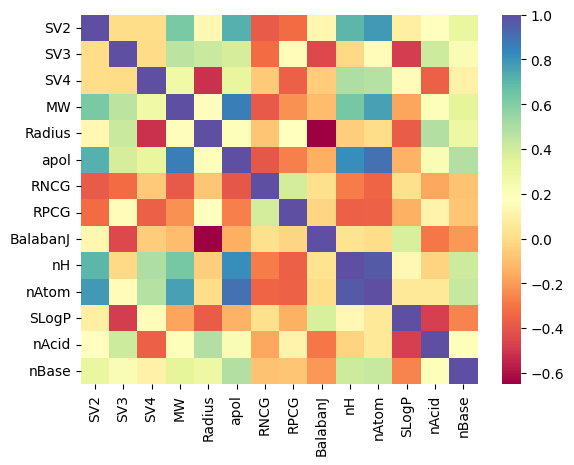

In [22]:
corr_comp = pd.concat(
    [
        df_pc[["SV2", "SV3", "SV4"]],
        pd.DataFrame(df_desc[interesting_columns], columns=interesting_columns),
    ],
    axis=1,
)
sns.heatmap(
    corr_comp.corr(),
    cmap="Spectral",
)


Here we can see that singular component 2 is negatively correlated with RNCG (relative negative charge) and positively correlated with nAtom (number of all atoms)

Singular component 3 is negatively correlated with BalabanJ (Balaban’s J index), SLogP (Wildman-Crippen LogP)

Singular component 4 is negatively correlated with Radius and nAcid (acidic group count)

We can also plot all of our samples in a space of two components just to see if there is some interesting information

Let's make a plot with SV1 and SV4 as axis and molecular weight as color

In [23]:
Mol_weight = df_desc["MW"]

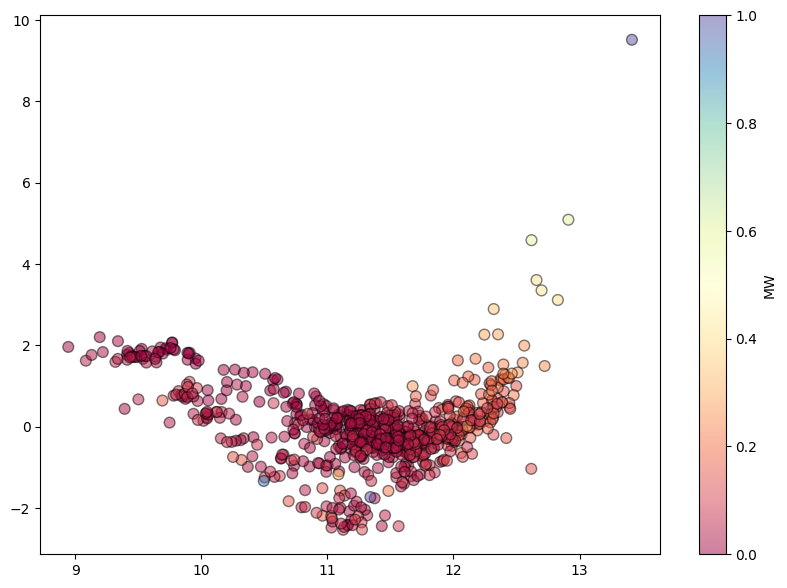

In [24]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
scatter = ax.scatter(
    df_svd[:, 0],
    df_svd[:, 3],
    c=Mol_weight,
    s=60,
    edgecolors="black",
    cmap="Spectral",
    alpha=0.5,
)
colorbar = fig.colorbar(scatter, ax=ax, label="MW")


We can clearly see some kind of relationship between components and molecular mass on this plot

Let's make a plot with SV1 and SV4 as axis and raw value as color

In [26]:
Raw_value = df_info["value_from"]

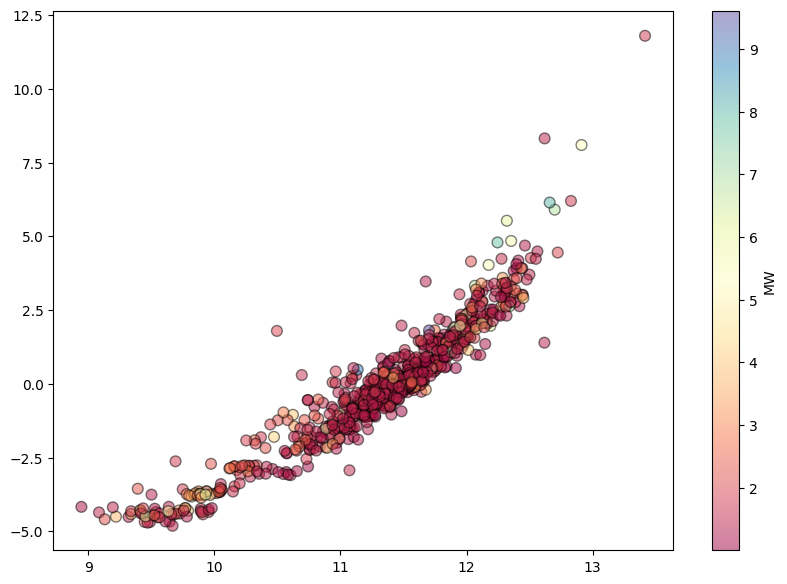

In [28]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
scatter = ax.scatter(
    df_svd[:, 0],
    df_svd[:, 1],
    c=Raw_value,
    s=60,
    edgecolors="black",
    cmap="Spectral",
    alpha=0.5,
)
colorbar = fig.colorbar(scatter, ax=ax, label="MW")


No clear relationship here, maybe we will see it after we apply clustering techniques

## Non-linear dimension reduction method

One of the most popular methods for non-linear dimension reduction is t-SNE (T-distributed Stochastic Neighbor Embedding). It should be good for our data, as it's suitable for high dimension data and robust to noise. We can also optimize perplexity variable in this method, let's make several plots.

In [29]:
from sklearn.manifold import TSNE


We will use color to show molecular weight

c:\Users\Ivan\mambaforge-pypy3\envs\py39\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Ivan\mambaforge-pypy3\envs\py39\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Ivan\mambaforge-pypy3\envs\py39\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Ivan\mambaforge-pypy3\envs\py39\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


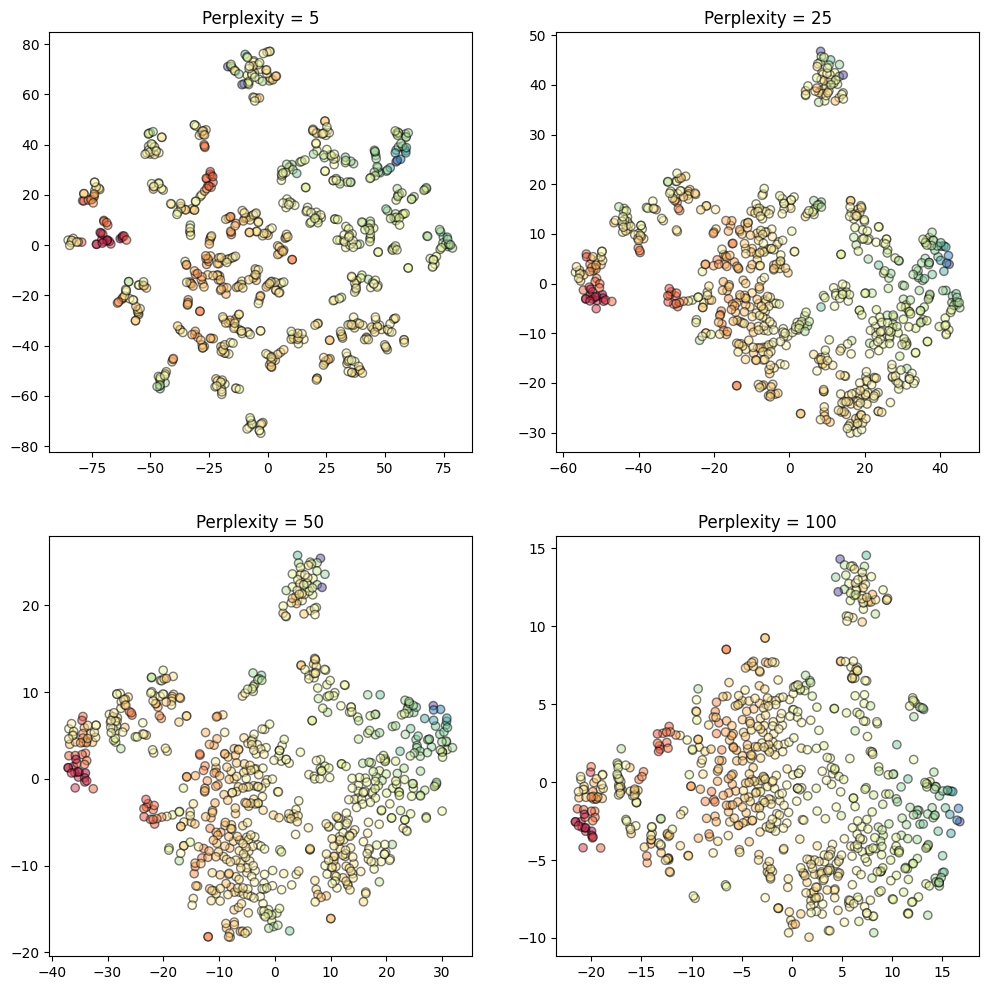

In [30]:
plt.figure(figsize=(12, 12))

for index, p in enumerate([5, 25, 50, 100]):

    # perform t-SNE
    tsne = TSNE(n_components=2, perplexity=p, random_state=42)
    tsne_df = tsne.fit_transform(df_desc)

    tsne_df = pd.DataFrame(tsne_df, columns=["tsne1", "tsne2"])

    # plot the results
    plt.subplot(2, 2, index + 1)
    plt.scatter(
        tsne_df["tsne1"],
        tsne_df["tsne2"],
        c=np.log(Mol_weight),
        edgecolors="black",
        cmap="Spectral",
        alpha=0.5,
    )
    plt.title("Perplexity = " + str(p))


We can see that with almost all values of perplexity there is a relationship between tsne components and molecular mass